In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *

In [2]:
def rastrigin(x, y, z):
    return 30 + x ** 2 + y ** 2 + z ** 2- 10 * cos(2 * pi * x) - 10 * cos(2 * pi * y)- 10 * cos(2 * pi * z)


def rastrigin_gradient(x, y, z):
    [grad_x, grad_y, grad_z] = [2 * (x + 10 * pi * sin(2 * pi * x)), 2 * (y + 10 * pi * sin(2 * pi * y)),2 * (z + 10 * pi * sin(2 * pi * z))]
    return np.array([grad_x, grad_y, grad_z])


def rastrigin_hessian(x, y, z):
    [[h11, h12, h13],[h21, h22, h23], [h31, h32, h33]] = [[40 * (pi ** 2) * cos(2 * pi * x) + 2, 0 , 0], [0, 40 * (pi ** 2) * cos(2 * pi * x) + 2, 0],[0, 0, 40 * (pi ** 2) * cos(2 * pi * x) + 2]]
    return [[h11, h12, h13],[h21, h22, h23], [h31, h32, h33]]

In [3]:
def gradient_descent(target_function, coordinates, gradient_of_target_function, optimization_hyper_parameters):

    value = []
    counter = 0

    learning_rate_gd = optimization_hyper_parameters

    gradient_magnitude = np.sqrt(gradient_of_target_function(coordinates[0], coordinates[1], coordinates[2])[0] ** 2 +
                                 gradient_of_target_function(coordinates[0], coordinates[1], coordinates[2])[0] ** 2 +
                                 gradient_of_target_function(coordinates[0], coordinates[1], coordinates[2])[0] ** 2)

    while gradient_magnitude > 1e-4 and counter < 1e4:

        [x_new, y_new, z_new] = list(np.array(coordinates) - learning_rate_gd *
                              gradient_of_target_function(coordinates[0], coordinates[1], coordinates[2]))

        coordinates = [x_new, y_new, z_new]

        gradient_magnitude = np.sqrt(gradient_of_target_function(coordinates[0], coordinates[1], coordinates[2])[0] ** 2 +
                                     gradient_of_target_function(coordinates[0], coordinates[1], coordinates[2])[0] ** 2 +
                                     gradient_of_target_function(coordinates[0], coordinates[1], coordinates[2])[0] ** 2)

        value.append(target_function(x_new, y_new,z_new))
        counter += 1

    return value

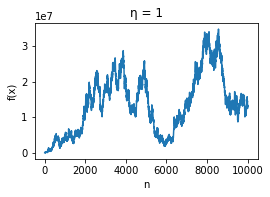

In [25]:
x = 2 * 5.12 * random.random() - 5.12
y = 2 * 5.12 * random.random() - 5.12
z = 2 * 5.12 * random.random() - 5.12
fig = plt.figure(figsize = (4, 2.5))
ax = plt.subplot(111)
plt.title('η = 1')
plt.xlabel("n")
plt.ylabel("f(x)")
value_1 = gradient_descent(rastrigin, [x, y, z], rastrigin_gradient, 1)
ax.plot(value_1, label='GD-0.0001')
plt.show()